# Notebook application example of CounterFactual Augmentation 

# Simple example with generated data


## Data Loading

For the sake of an example we consider a two-class problem with 3 features data. Each feature following a Gaussian Distribution with different parameters $(\mu, \sigma^2)$.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from cfa import CFA

# Number of samples per class
n_1 = 10
n_2 = 2

# Class 1 parameters
mean_class1 = [.5,.5]
std_class1 = [.1,.1]

# Class 2 parameters
mean_class2 = [0,0]
std_class2 = [.1,.1]

# Generate data 
data_class1 = np.random.normal(loc=mean_class1, scale=std_class1, size=(n_1, 2))
data_class2 = np.random.normal(loc=mean_class2, scale=std_class2, size=(n_2, 2))
# Create DataFrame and add class labels
df_class1 = pd.DataFrame(data_class1, columns=['Feature1', 'Feature2'])
df_class1['Class'] = 1
df_class2 = pd.DataFrame(data_class2, columns=['Feature1', 'Feature2'])
df_class2['Class'] = 2
df = pd.concat([df_class1, df_class2], ignore_index=True)

# Shuffle the DataFrame
df = df.sample(frac=1).reset_index(drop=True)


df




,Feature1,Feature2,Class
0,0.533927,0.662709,1
1,0.567714,0.539577,1
2,0.356622,0.343167,1
3,0.565782,0.549519,1
4,0.476079,0.550757,1
5,0.091059,0.068443,2
6,0.012469,-0.112304,2
7,0.482067,0.475456,1
8,0.515220,0.361998,1
9,0.458932,0.325268,1


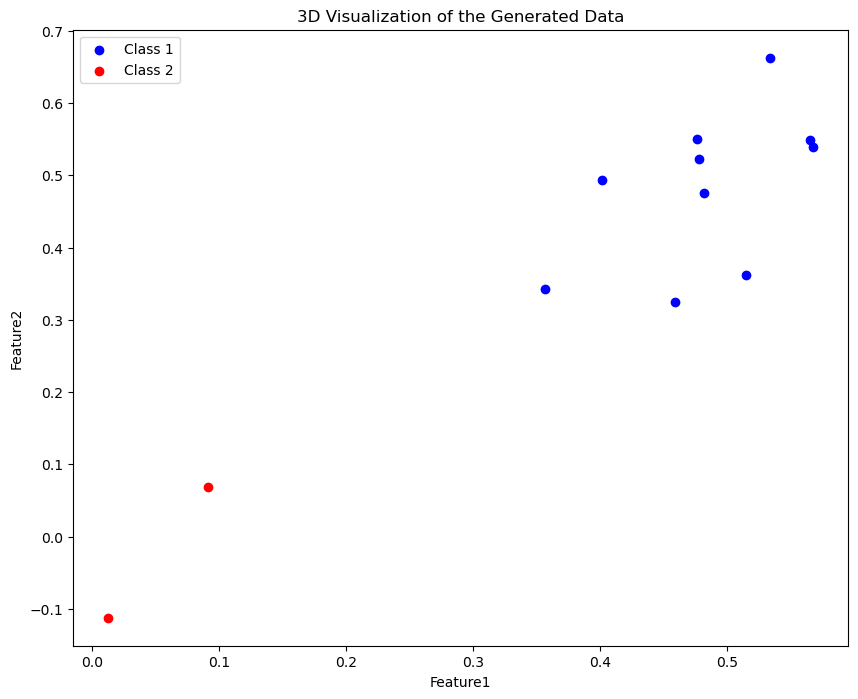

In [21]:

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

ax.scatter(df_class1['Feature1'], df_class1['Feature2'], color='blue', label='Class 1')
ax.scatter(df_class2['Feature1'], df_class2['Feature2'], color='red', label='Class 2')

ax.set_xlabel('Feature1')
ax.set_ylabel('Feature2')

ax.set_title('3D Visualization of the Generated Data')
ax.legend()

plt.show()

In [22]:
# Creating CFA synthetic counterfactuals data
# For this example we fix tol very high to show that the algorithm works

cfa = CFA(fd=2, tol=0.6)

X = df[['Feature1', 'Feature2']].values
y = df['Class'].values
synthetic_counterfactuals, classes = cfa.run_cfa(X, y, get_synt_labels=False)
synthetic_counterfactuals.shape


(20, 2)

In [23]:
# Add the synthetic counterfactuals to the original data, the class label is 2 (minority classes), add column that indicates the synthetic counterfactuals or not

df_cfa = pd.DataFrame(synthetic_counterfactuals, columns=['Feature1', 'Feature2'])
df_cfa['Class'] = classes
df_cfa





,Feature1,Feature2,Class
0,0.533927,0.662709,1.0
1,0.567714,0.539577,1.0
2,0.356622,0.343167,1.0
3,0.565782,0.549519,1.0
4,0.476079,0.550757,1.0
5,0.091059,0.068443,2.0
6,0.012469,-0.112304,2.0
7,0.482067,0.475456,1.0
8,0.515220,0.361998,1.0
9,0.458932,0.325268,1.0


In [24]:
# Creating CFA synthetic counterfactuals data
# For this example we fix tol very high to show that the algorithm works

cfa = CFA(fd=2, tol=0.6)

X = df[['Feature1', 'Feature2']].values
y = df['Class'].values
synthetic_counterfactuals, classes, synth_labels = cfa.run_cfa(X, y, get_synt_labels=True)
synthetic_counterfactuals.shape


(20, 2)

In [25]:
df_cfa = pd.DataFrame(synthetic_counterfactuals, columns=['Feature1', 'Feature2'])
df_cfa['Class'] = classes
df_cfa['Synthetic'] = synth_labels
df_cfa

,Feature1,Feature2,Class,Synthetic
0,0.533927,0.662709,1,0.0
1,0.567714,0.539577,1,0.0
2,0.356622,0.343167,1,0.0
3,0.565782,0.549519,1,0.0
4,0.476079,0.550757,1,0.0
5,0.091059,0.068443,2,0.0
6,0.012469,-0.112304,2,0.0
7,0.482067,0.475456,1,0.0
8,0.515220,0.361998,1,0.0
9,0.458932,0.325268,1,0.0


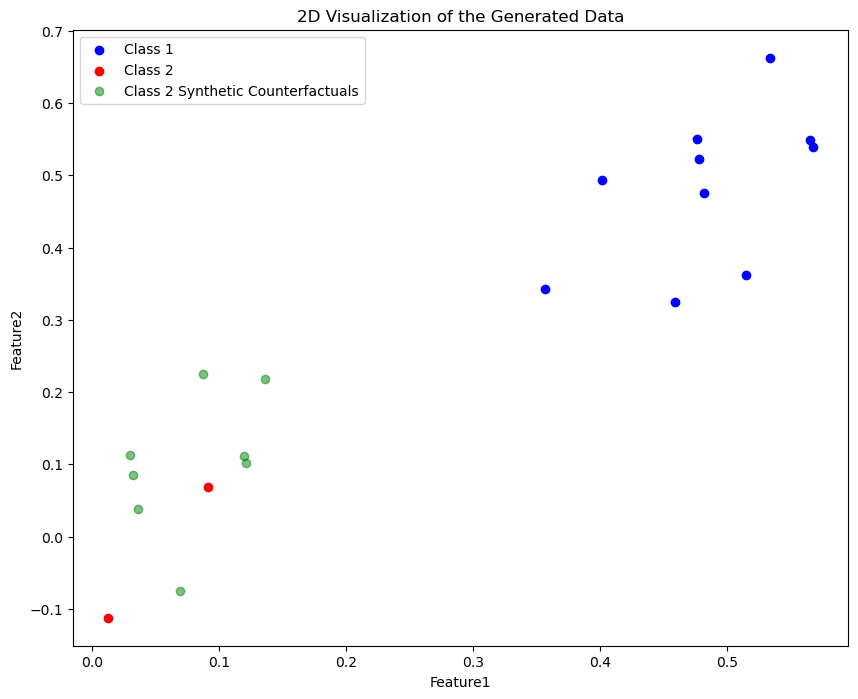

In [26]:
# 2D Plotting (with synthetic counterfactuals alpha = 0.5)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

#plot points from class 1
ax.scatter(df_cfa[df_cfa['Class'] == 1]['Feature1'], df_cfa[df_cfa['Class'] == 1]['Feature2'], color='blue', label='Class 1')
#plot point from class 2 not synthetic counterfactuals
ax.scatter(df_cfa[(df_cfa['Class'] == 2) & (df_cfa['Synthetic'] == 0)]['Feature1'], df_cfa[(df_cfa['Class'] == 2) & (df_cfa['Synthetic'] == 0)]['Feature2'], color='red', label='Class 2')

#plot point from class 2 synthetic counterfactuals
ax.scatter(df_cfa[(df_cfa['Class'] == 2) & (df_cfa['Synthetic'] == 1)]['Feature1'], df_cfa[(df_cfa['Class'] == 2) & (df_cfa['Synthetic'] == 1)]['Feature2'], color='green', alpha=0.5, label='Class 2 Synthetic Counterfactuals')



ax.set_xlabel('Feature1')
ax.set_ylabel('Feature2')

ax.set_title('2D Visualization of the Generated Data')
ax.legend()

plt.show()

## CounterFactual Augmentation


# Using Datasets 


## Data loading


In [13]:
data = pd.read_csv('data/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


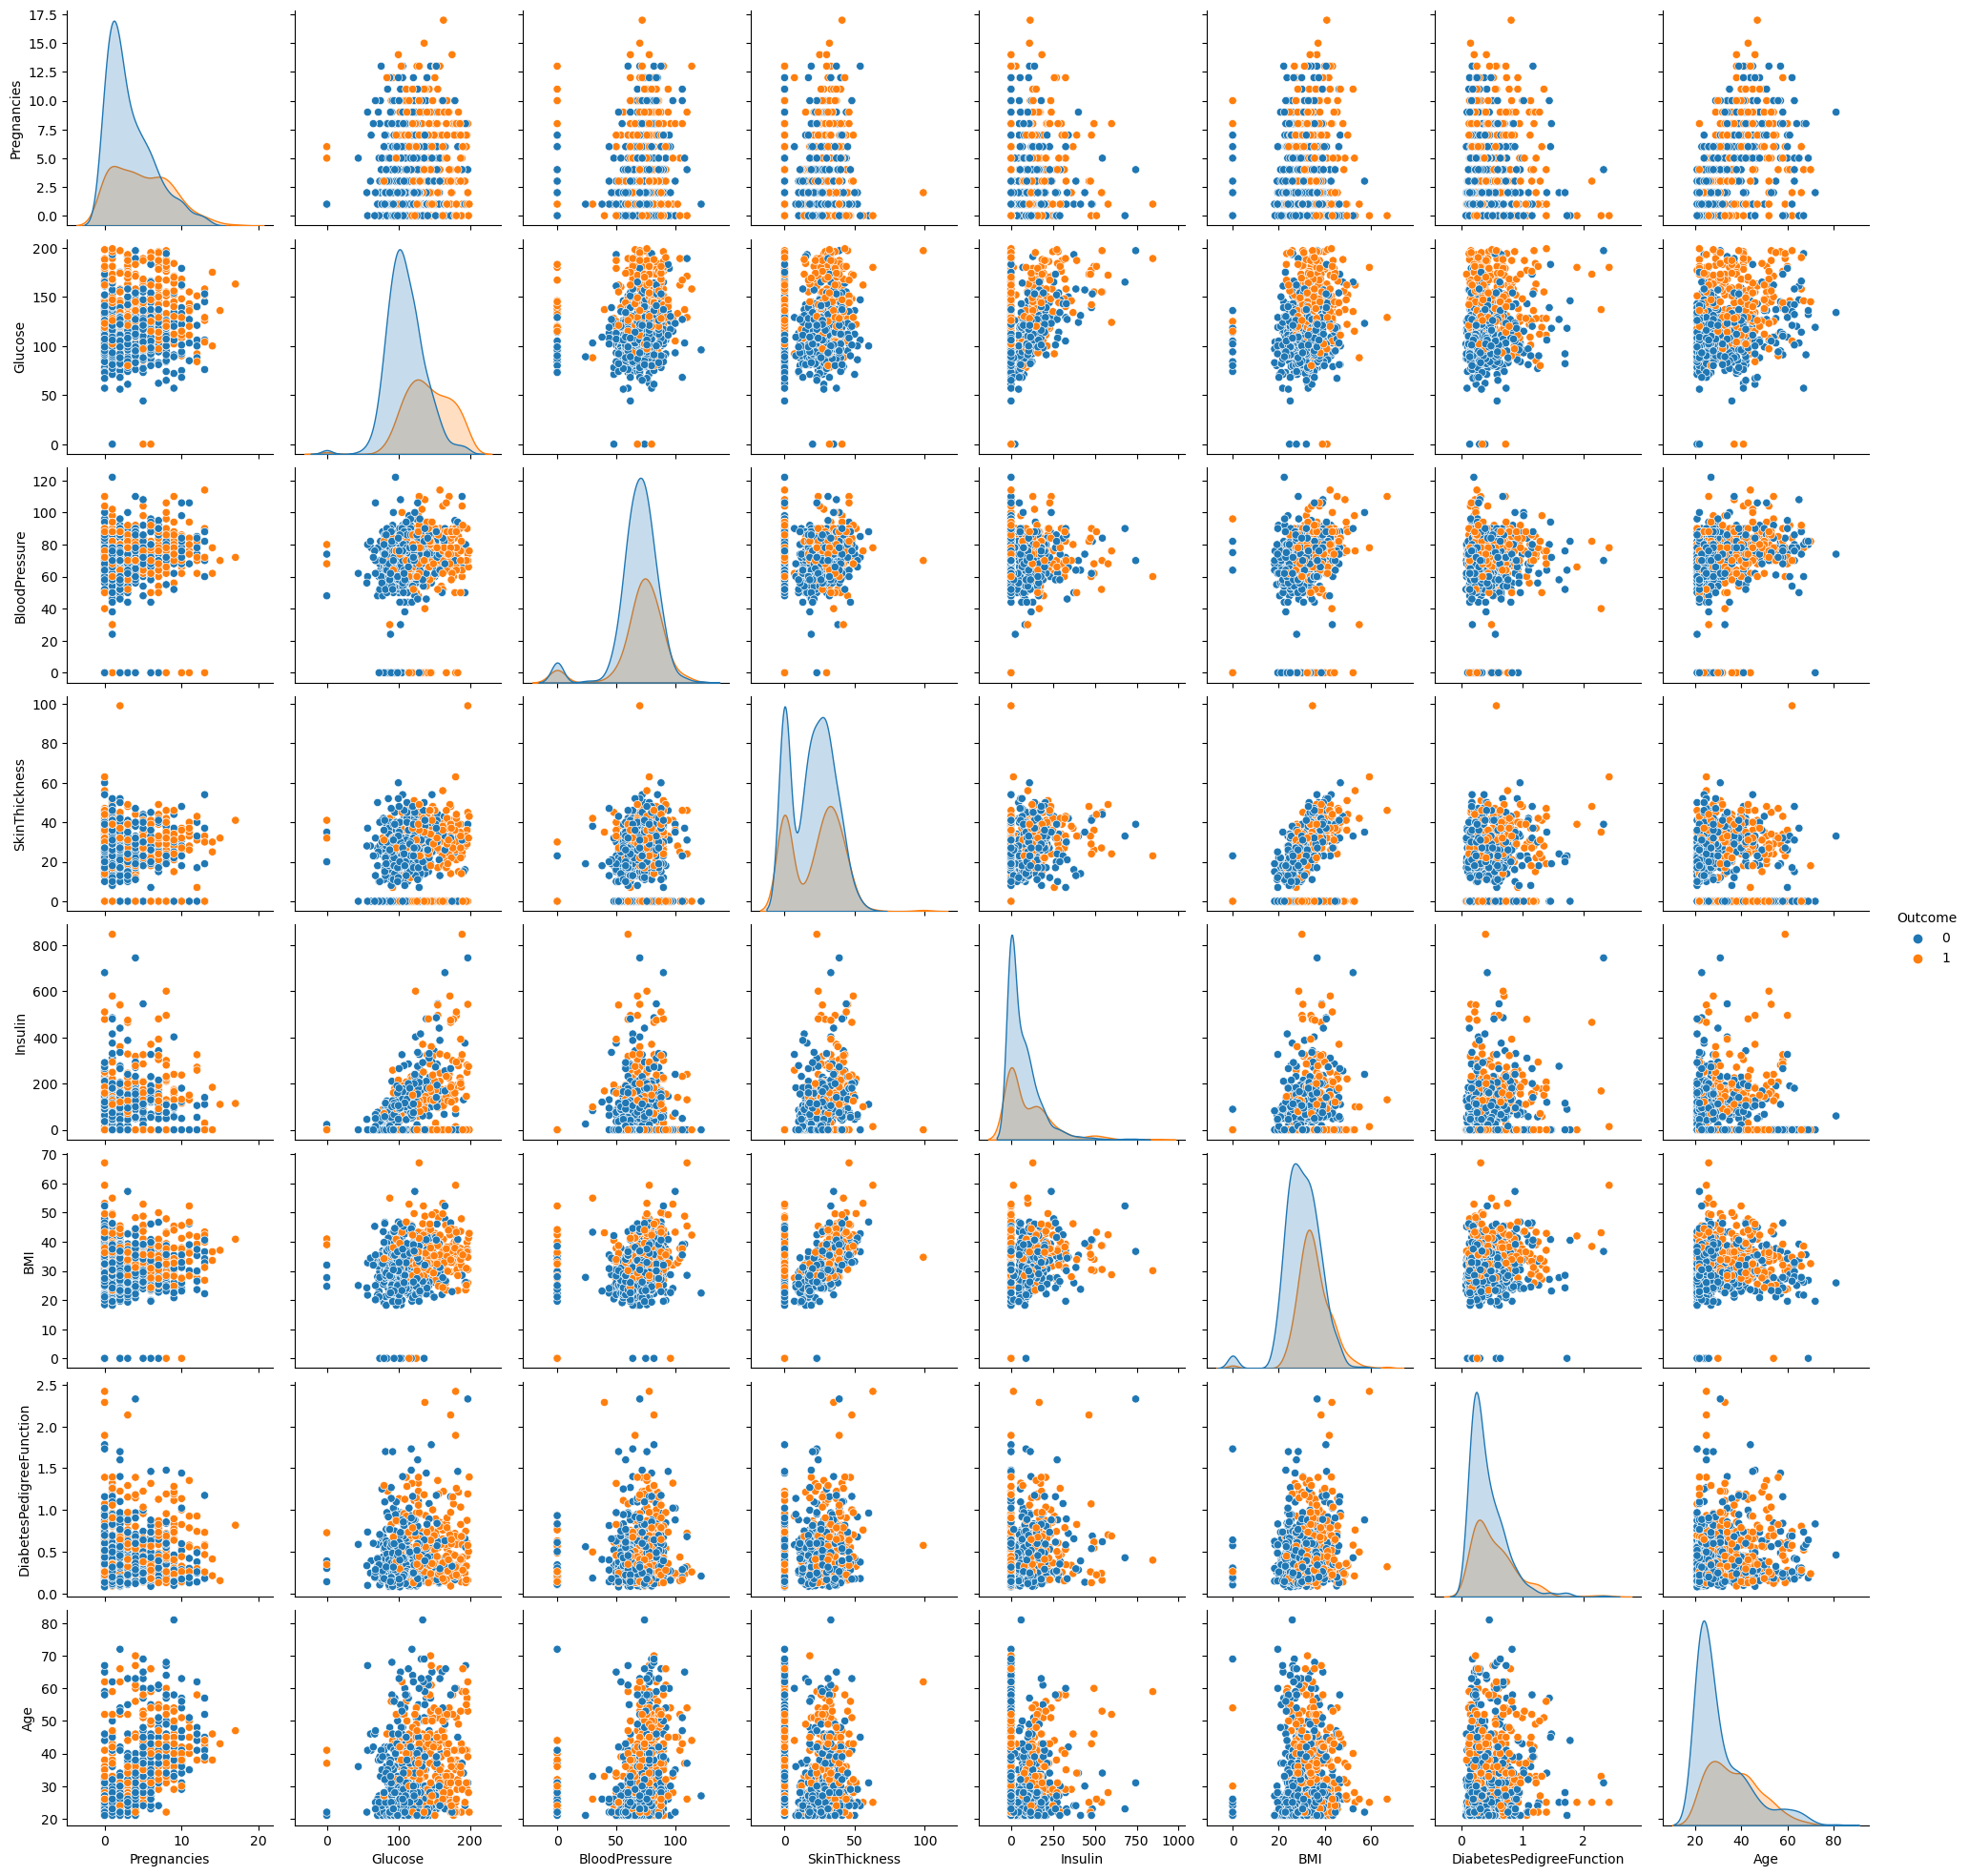

In [14]:
import seaborn as sns

sns.pairplot(data, hue='Outcome')

Outcome
0    500
1    268
Name: count, dtype: int64

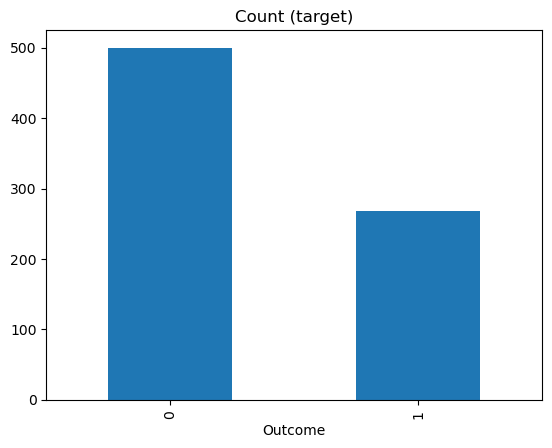

In [15]:
X_data = data.drop('Outcome', axis=1)
y_data = data['Outcome']
# plot imbalance

y_data.value_counts().plot(kind='bar', title='Count (target)')
y_data.value_counts()

# Generating data

In [16]:
cfa = CFA(fd=2, tol=0.2)

X = X_data.values
y = y_data.values
synthetic_counterfactuals, classes, synth_labels = cfa.run_cfa(X, y, get_synt_labels=True)
synthetic_counterfactuals.shape


(872, 8)

In [17]:
# merging the synthetic counterfactuals with the original data
df_cfa = pd.DataFrame(synthetic_counterfactuals, columns=data.columns[:-1])
df_cfa['Outcome'] = classes
df_cfa['Synthetic'] = synth_labels
df_cfa

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Synthetic
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1,0.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1,0.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...
867,7.0,99.0,58.0,26.0,0.0,41.7,0.483,26.0,1,1.0
868,14.0,69.0,78.0,24.0,0.0,35.5,0.584,47.0,1,1.0
869,4.0,105.0,62.0,21.0,0.0,27.5,0.313,27.0,1,1.0
870,13.0,91.0,66.0,0.0,0.0,19.2,0.040,39.0,1,1.0


<Axes: title={'center': 'Count (target)'}, xlabel='Outcome'>

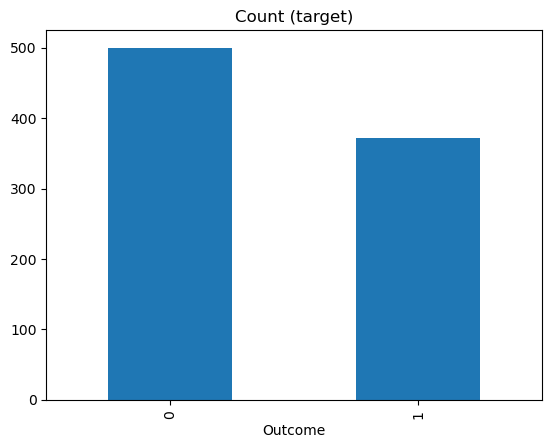

In [18]:
# plot imbalance
df_cfa['Outcome'].value_counts().plot(kind='bar', title='Count (target)')

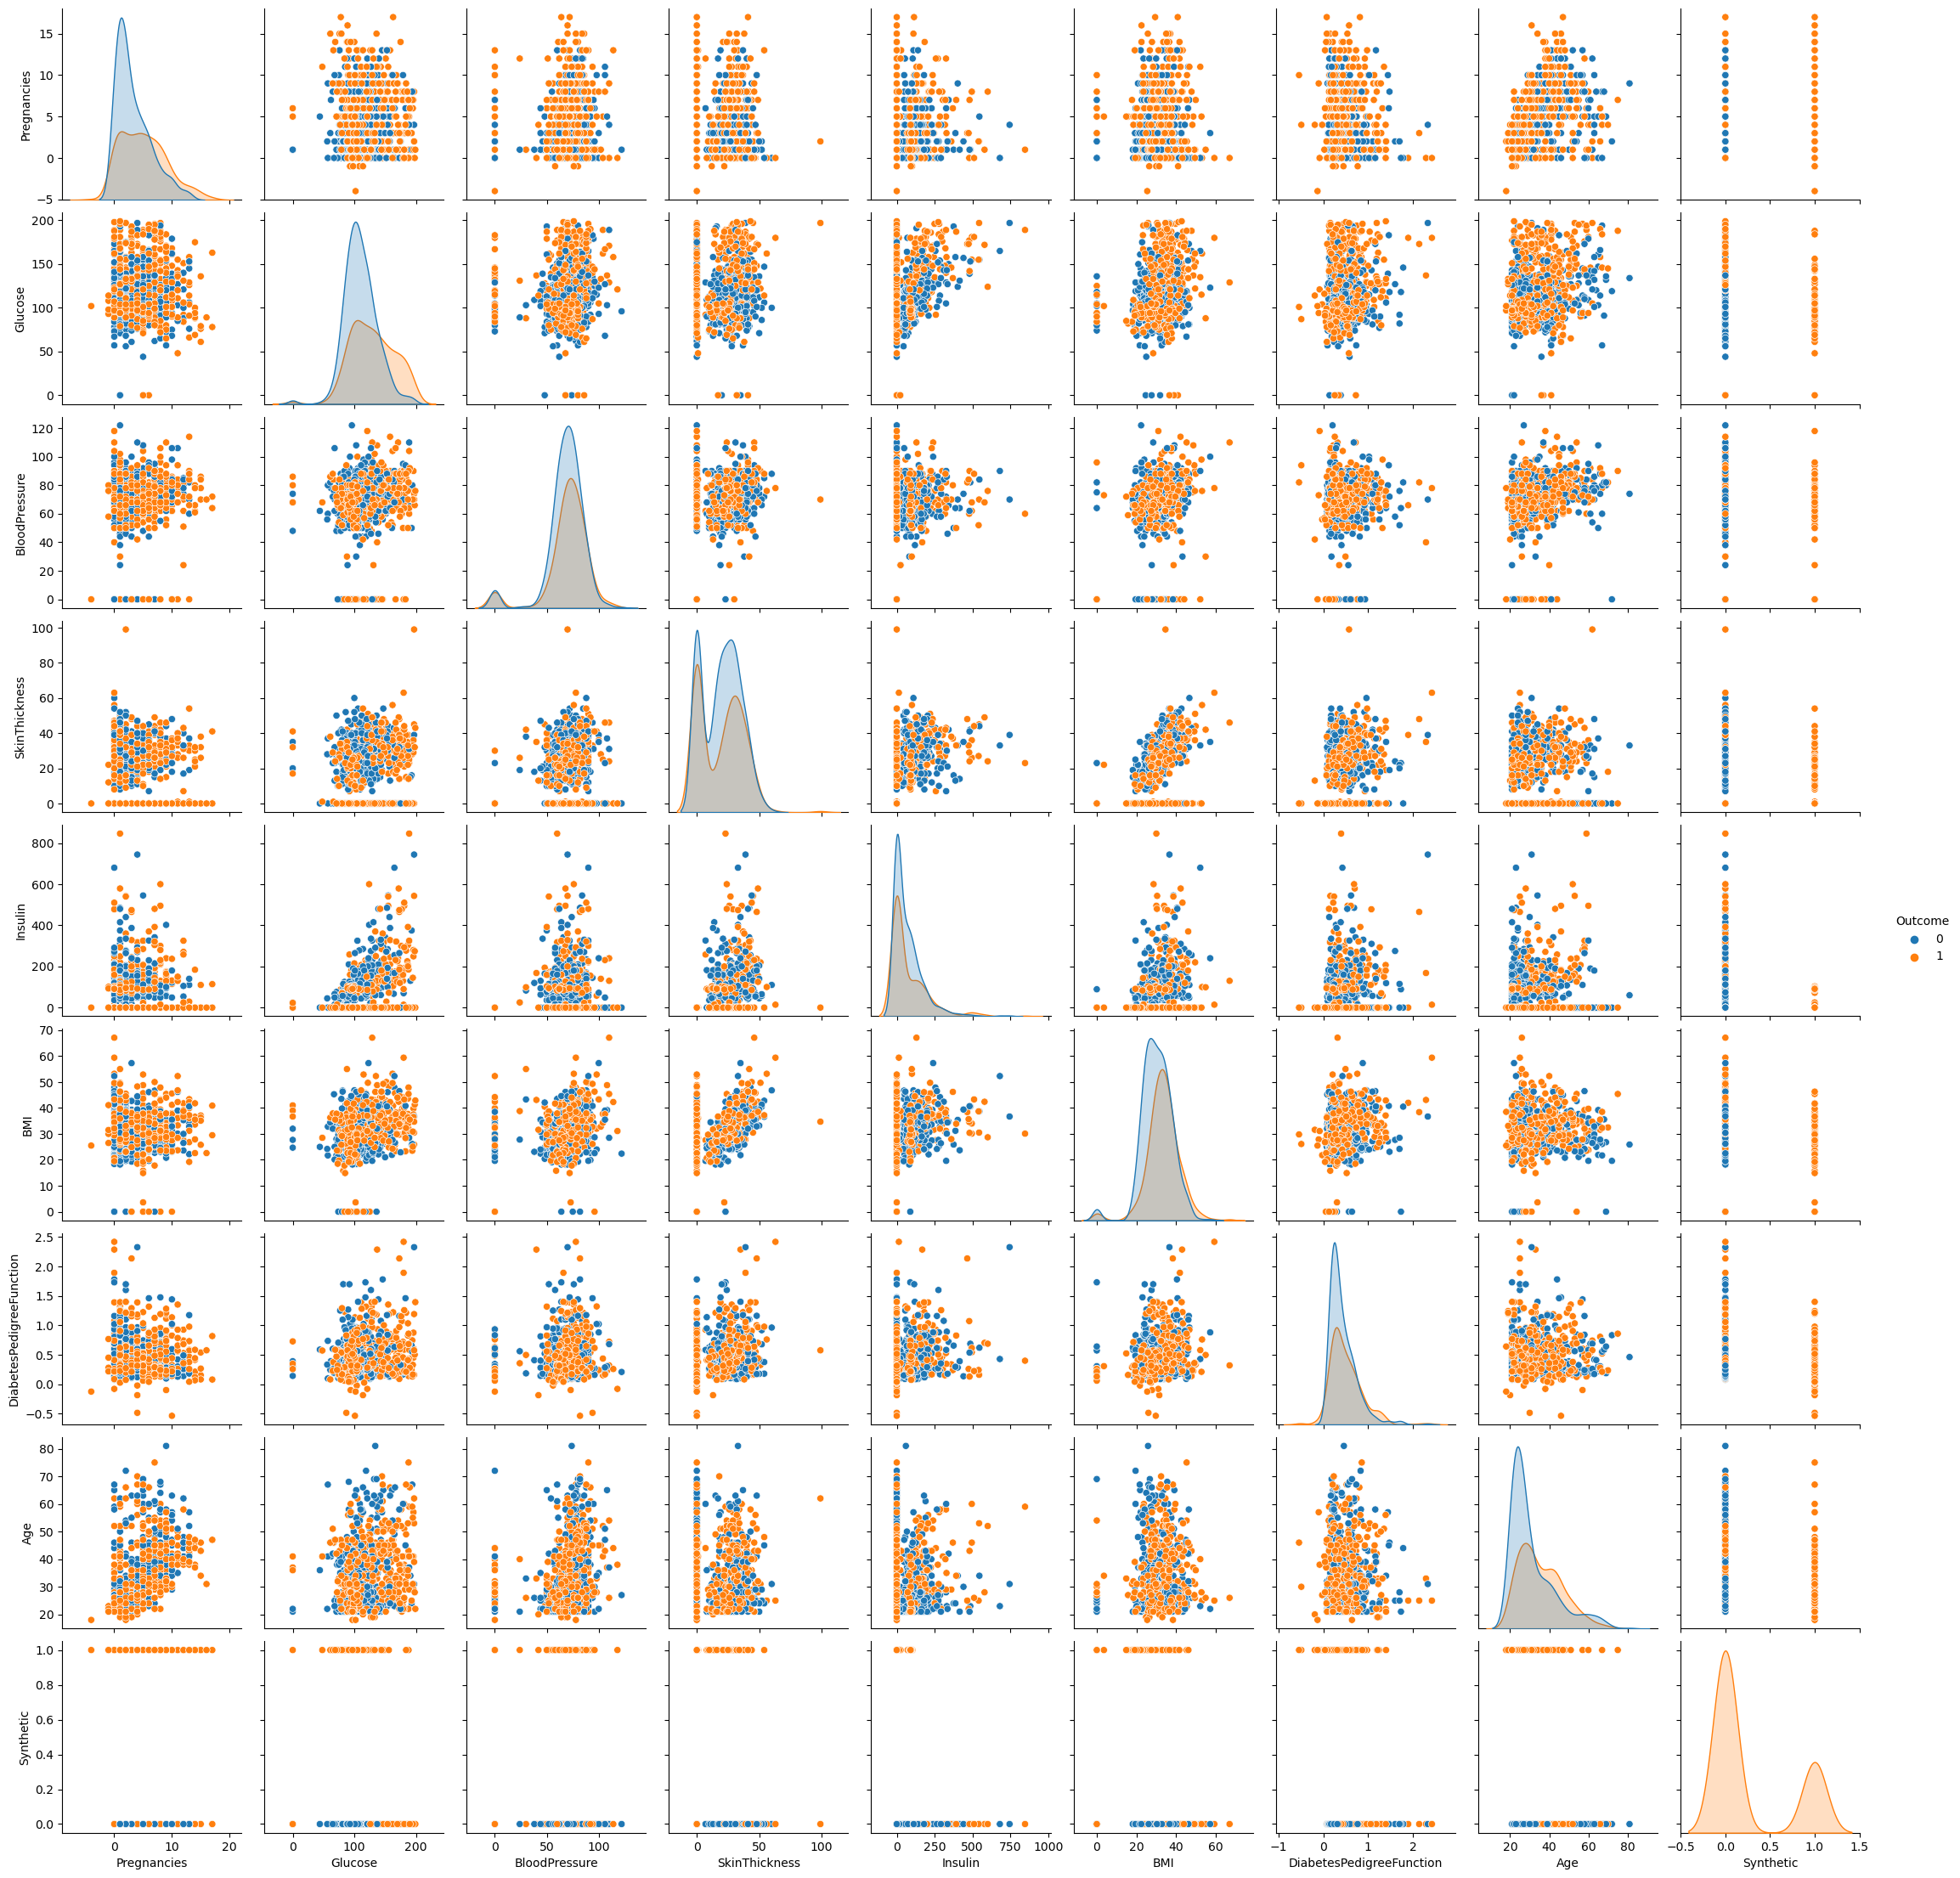

In [19]:
sns.pairplot(df_cfa, hue='Outcome')